In [1]:
# Import neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.option_context('mode.use_inf_as_na', True)

# Preprocessing:

In [2]:
path = r"C:\Users\Alvin Nguyen\OneDrive\Công việc\Github Portfolio Content\Portfolio Project\ML_Churn Predict Project\churn_prediction.xlsx"
df = pd.read_excel(path)

## Explore shape and data info

In [3]:
# Check first 5 rows of the dataset
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
# Check last 5 rows of the dataset
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


In [5]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Data Balance

In [6]:

distribute = df.groupby('Churn', as_index=False)['Churn'].count()
distribute['%'] = distribute['Churn'] / len(df) * 100
distribute

,Churn,%
0,4682,83.161634
1,948,16.838366


- Tỉ lệ được phân bổ tốt, không cần thực hiện resample

## Data duplicates

In [7]:
# Data duplicates
df.duplicated().sum()

0

## Null values

In [8]:
null_count=df.isna().sum().sum()
print(f'% Missing values vs total observations is: {null_count}/{len(df)} ~ {null_count / len(df)*100:.2f}%')

% Missing values vs total observations is: 1856/5630 ~ 32.97%


In [9]:
df.isna().sum().sort_values(ascending=False)

DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
CustomerID                       0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
Churn                            0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

\
Only **_Numeric columns_** have null values

### Fill null values with interpolate with _linear_ method

In [10]:
new_df = df.interpolate()

new_df.isna().sum().sort_values(ascending=False)

C:\Users\Alvin Nguyen\AppData\Local\Temp\ipykernel_824\1303147145.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  new_df = df.interpolate()


CustomerID                     0
Churn                          0
DaySinceLastOrder              0
OrderCount                     0
CouponUsed                     0
OrderAmountHikeFromlastYear    0
Complain                       0
NumberOfAddress                0
MaritalStatus                  0
SatisfactionScore              0
PreferedOrderCat               0
NumberOfDeviceRegistered       0
HourSpendOnApp                 0
Gender                         0
PreferredPaymentMode           0
WarehouseToHome                0
CityTier                       0
PreferredLoginDevice           0
Tenure                         0
CashbackAmount                 0
dtype: int64

## Import Machine Learning Library

In [13]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split

### Separate String and Numeric columns

In [ ]:
cat_cols = []
num_cols = []

for col in new_df.columns:
    if new_df[col].dtype == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [43]:
print(f'List of categorical variables \n {cat_cols} \n\n')
print(f'List of numerical variables \n {num_cols}')

List of categorical variables 
 ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'] 


List of numerical variables 
 ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


### Covert String datatype to binary

In [14]:
dummies_df = pd.get_dummies(new_df, dtype='int64')
dummies_df

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.000000,3,6.0,3.0,3,2,9,1,...,0,0,0,1,0,0,0,0,0,1
1,50002,1,2.666667,1,8.0,3.0,4,3,7,1,...,1,0,0,0,1,0,0,0,0,1
2,50003,1,1.333333,1,30.0,2.0,4,3,6,1,...,1,0,0,0,1,0,0,0,0,1
3,50004,1,0.000000,3,15.0,2.0,4,5,8,0,...,1,0,0,1,0,0,0,0,0,1
4,50005,1,0.000000,1,12.0,2.5,3,5,3,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.000000,1,30.0,3.0,2,1,6,0,...,1,0,0,1,0,0,0,0,1,0
5626,55627,0,13.000000,1,13.0,3.0,5,5,6,0,...,1,1,0,0,0,0,0,0,1,0
5627,55628,0,1.000000,1,11.0,3.0,2,4,3,1,...,1,0,0,1,0,0,0,0,1,0
5628,55629,0,23.000000,3,9.0,4.0,5,4,4,0,...,1,0,0,1,0,0,0,0,1,0


### Separate Independent and Dependent Features

In [15]:
X = dummies_df.drop('Churn', axis=1)
y = dummies_df.Churn

print(X.shape, y.shape)

(5630, 35) (5630,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scale Numeric Data to same scale

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
clf = DecisionTreeClassifier(max_depth=16, random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

### Using Decision Tree model too pick important features for EDA process and modeling after:

In [65]:
# Get feature importances
importances = clf.feature_importances_
 
# Select features with importance greater than a threshold
threshold = 0.06  # Adjust as needed
selected_features = X.columns[importances > threshold]
 
# Use only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected.head()

,Tenure,DaySinceLastOrder,CashbackAmount
1559,0.0,4.0,126.57
993,9.0,0.0,120.61
1187,0.0,0.0,129.56
188,6.0,6.0,218.78
4630,1.0,2.0,149.00


# Start EDA by picked features

In [66]:
important_features = list(X_train_selected.columns) + ['Churn']

eda_df = new_df[important_features].copy()

eda_df

,Tenure,DaySinceLastOrder,CashbackAmount,Churn
0,4.000000,5.0,159.93,1
1,2.666667,0.0,120.90,1
2,1.333333,3.0,120.28,1
3,0.000000,3.0,134.07,1
4,0.000000,3.0,129.60,1
...,...,...,...,...
5625,10.000000,4.0,150.71,0
5626,13.000000,4.0,224.91,0
5627,1.000000,4.0,186.42,0
5628,23.000000,9.0,178.90,0


In [64]:
eda_df.groupby('Churn').agg({'Tenure': 'mean', 'DaySinceLastOrder': 'mean', 'CashbackAmount':'mean'})

,Tenure,DaySinceLastOrder,CashbackAmount
Churn,,,
0,11.456375,4.823366,180.635203
1,3.810390,3.328586,160.370928


## Correlation:

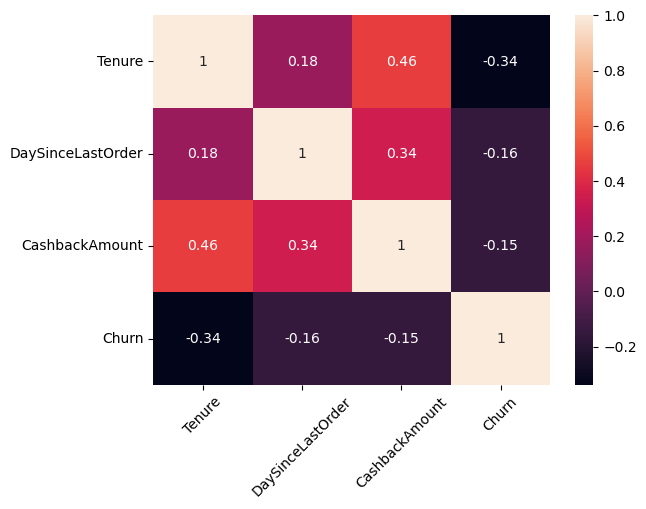

In [24]:
ax = sns.heatmap(eda_df.corr(), annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

- Correlation cho thấy những khách hàng có thời gian gắn bó càng dài, Recency cao và CashBackAmout lớn sẽ có tỉ lệ rời bỏ thấp hơn

## Visualize each variables

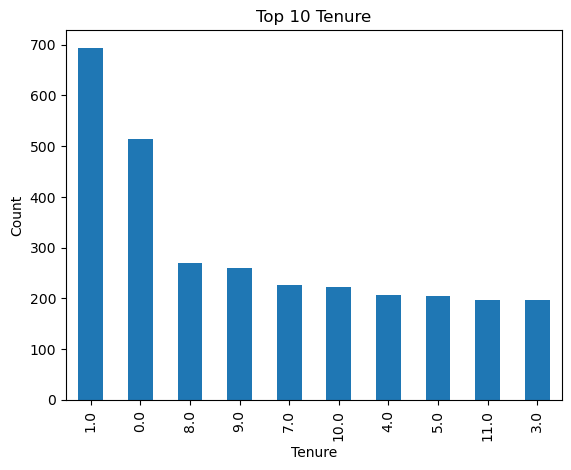

In [25]:
ax = eda_df['Tenure'].value_counts() \
                .head(10) \
                .plot(kind='bar', title='Top 10 Tenure')
ax.set_ylabel('Count')
plt.show()

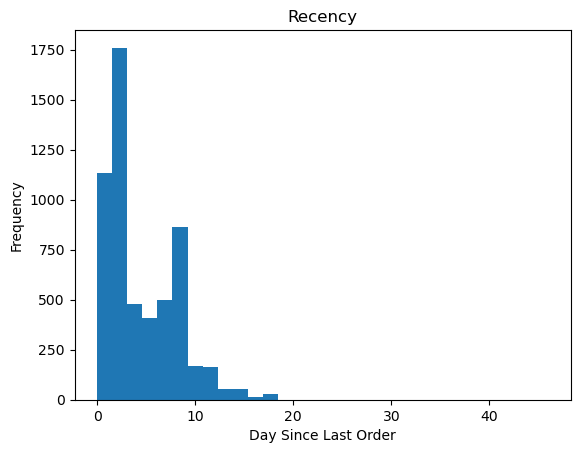

In [26]:
ax = eda_df['DaySinceLastOrder'].plot(kind='hist', bins=30, title='Recency')
ax.set_xlabel('Day Since Last Order')
plt.show()

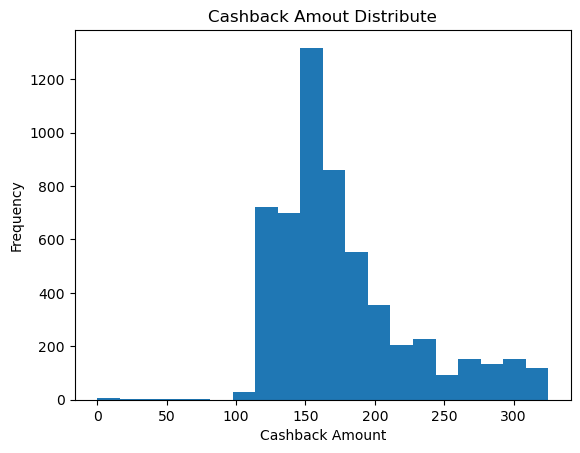

In [27]:
ax = eda_df['CashbackAmount'].plot(kind='hist', bins=20, title='Cashback Amout Distribute')
ax.set_xlabel('Cashback Amount')
plt.show()

### Churn rate by Tenure

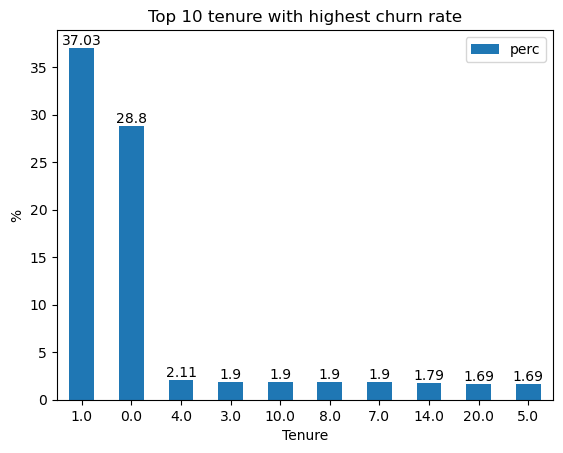

In [28]:
churn_rate = eda_df.query('Churn == 1').groupby(['Tenure'], as_index=False)['Churn'].count().sort_values(by='Tenure')

churn_rate['perc'] = (churn_rate['Churn'] / churn_rate['Churn'].sum() * 100).round(2)

# ax = churn_rate.query('perc > 1.75').loc[:, ['Tenure', 'perc']].set_index('Tenure').plot(kind='bar', title='')
ax = churn_rate.loc[:, ['Tenure', 'perc']].sort_values(by='perc', ascending=False).head(10).set_index('Tenure').plot(kind='bar', title='Top 10 tenure with highest churn rate')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.bar_label(container=ax.containers[0])
ax.set_ylabel('%')

plt.show()

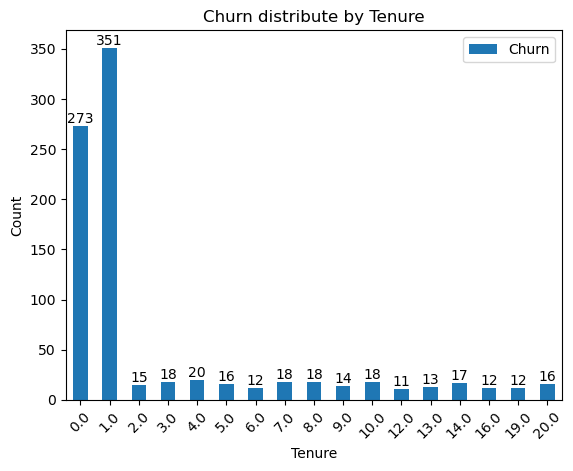

In [29]:
ax = eda_df.query('Churn == 1') \
           .groupby(['Tenure'], as_index=False)['Churn'] \
           .count().sort_values(by='Tenure') \
           .query('Churn > 10') \
           .set_index('Tenure') \
           .plot(kind='bar', title='Churn distribute by Tenure')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.bar_label(container=ax.containers[0])
ax.set_ylabel('Count')
plt.show()

## Relationship between variables:

In [30]:
eda_df['Tenure'] = eda_df['Tenure'].round(2)

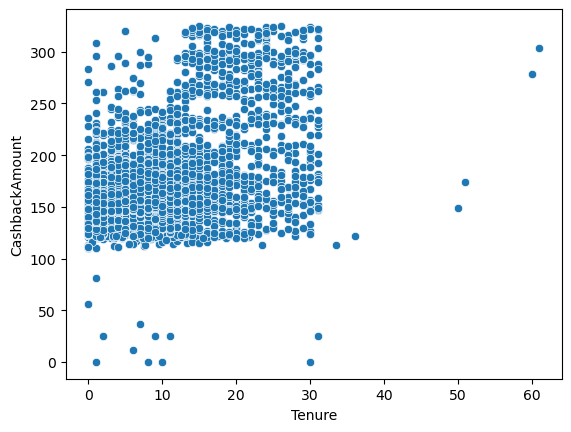

In [31]:
ax = sns.scatterplot(x='Tenure', y='CashbackAmount', data=eda_df)
plt.show()

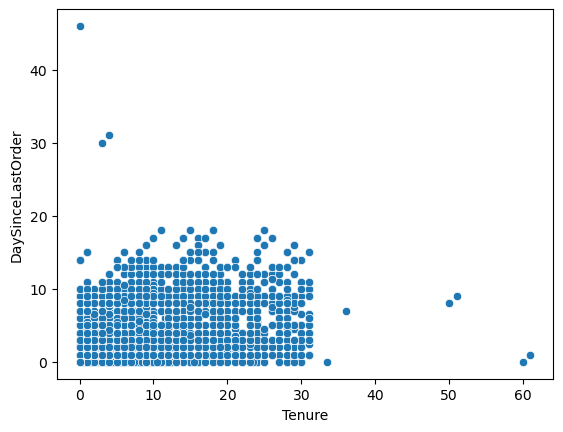

In [32]:
sns.scatterplot(x='Tenure', y='DaySinceLastOrder', data=eda_df)
plt.show()

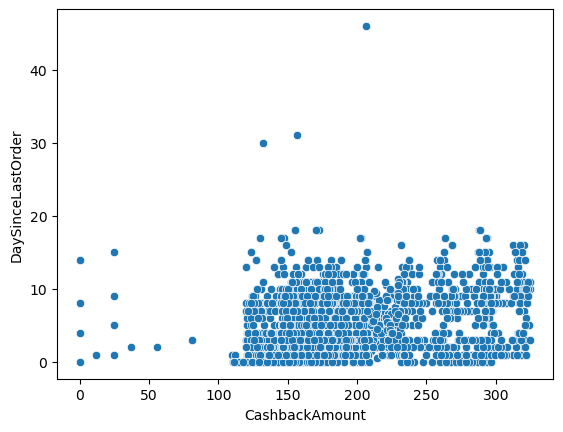

In [33]:
sns.scatterplot(x='CashbackAmount', y='DaySinceLastOrder', data=eda_df)
plt.show()

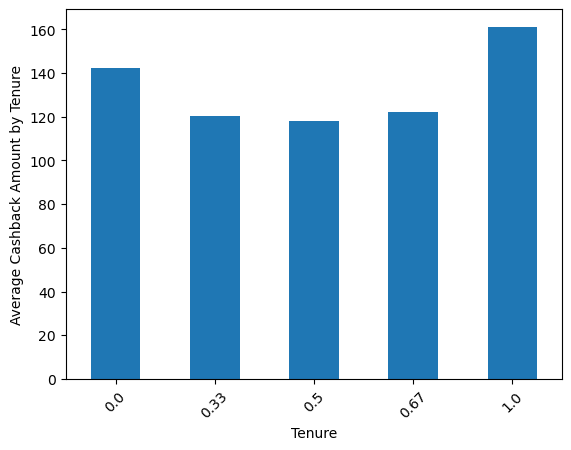

In [34]:
# ax = eda_df.query('Tenure != 0 and DaySinceLastOrder != 0') \
ax= eda_df.groupby(['Tenure'])['CashbackAmount'].mean() \
    .head(5) \
    .plot(kind='bar')

ax.set_ylabel('Average Cashback Amount by Tenure')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()





## EDA Conclusion

- Những khách hàng lâu năm (thể hiện bởi high Tenure) có tỉ lệ rời bỏ thấp hơn.
- Bên cạnh tỉ lệ giao dịch thường xuyên và cashback amount cũng góp phần giữ khách hàng ở lại và làm giảm tỉ lệ rời bỏ
- Khách hàng thường có xu hướng rời bỏ trong 1 năm đầu tiên. **(Chiếm >65% total churn của dataset)**

--- 
- Summary:
    - Cần tập trung chăm sóc những khách hàng mới để giảm tỉ lệ rời bỏ trong 1 năm đầu
    - Đa đạng hóa các chương trình cashback amount, và các chương trình những chương trình ưu đãi khác như các chương trình kỷ niệm 1 năm tính từ ngày có giao dịch đầu tiên
    - Thường xuyên tương tác và nhắc khách quay lại mua hàng định kỳ. Qua đó giảm tỉ lệ rời bỏ.

---

# Apply Machine Learning Model:

In [35]:
# columns_trans = make_column_transformer(
#     (OneHotEncoder(), cat_cols), remainder='passthrough')

# columns_trans = make_column_transformer((StandardScaler(), num_cols), remainder='passthrough')

logreg = LogisticRegression(random_state=99)
dtc = DecisionTreeClassifier(max_depth=16, random_state=42)

In [36]:
pipe = Pipeline(steps=[('classifier', dtc)])

In [37]:
full_features_model = cross_val_score(pipe, X_train_scaled,
                                      y_train, cv=10, scoring='accuracy',
                                      error_score='raise').mean()
full_features_model

0.9243802608751526

In [38]:
important_features_model = cross_val_score(pipe, X_train_selected,
                                           y_train, cv=10, scoring='accuracy',
                                           error_score='raise').mean()
important_features_model

0.8939349739767396

## Evaluating classification models

### Full Features Dataset

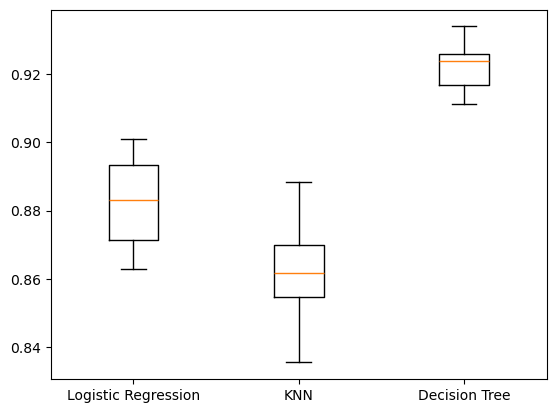

In [39]:
models = {"Logistic Regression": LogisticRegression(random_state=42), 
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(random_state=42)}
full_features_results = []

for model in models.values():
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    full_features_results.append(cv_results)

plt.boxplot(full_features_results, labels=models.keys())
plt.show()

In [40]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{name} Test Set Accuracy: {test_score*100:.2f}%")

Logistic Regression Test Set Accuracy: 89.82%
KNN Test Set Accuracy: 88.10%
Decision Tree Test Set Accuracy: 94.20%


----


### Important Features Model Results

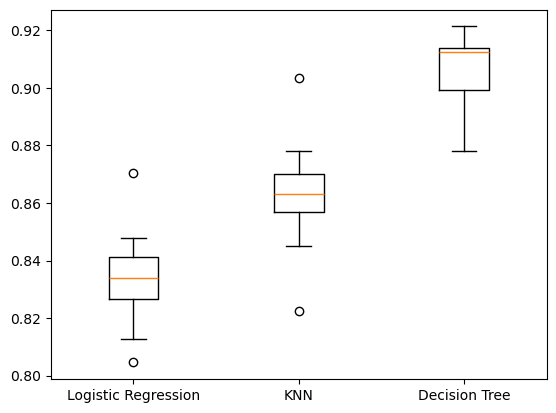

In [41]:
models = {"Logistic Regression": LogisticRegression(random_state=42), 
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(random_state=42)}
important_features_results = []

for model in models.values():
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_selected, y_train, cv=kf)
    important_features_results.append(cv_results)

plt.boxplot(important_features_results, labels=models.keys())
plt.show()

In [42]:
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    test_score = model.score(X_test_selected, y_test)
    print(f"{name} Test Set Accuracy: {test_score*100:.2f}%")

Logistic Regression Test Set Accuracy: 83.96%
KNN Test Set Accuracy: 85.55%
Decision Tree Test Set Accuracy: 92.54%
